<a href="https://colab.research.google.com/github/arindamkeswani/RePlicate/blob/main/RePlicate_(HPC_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Description:
RePlicator (Relative Plagiarism Indicator) is a plagiarism detector meant to reduce the time taken to calculate level of plagiarism of a document with all the others in a dataset by using concepts of data-parallelism and libraries that work on similar principles


---



Observations and assumptions so far:
1. Since an online plag checker would work on a cloud platform, we abandoned local testing in favour of a platform like Colab, as that would give results that are more realistic
2. Major tests done include comparing the execution time taken by:
  1. Serial implementation (for base time)
  2. Multiprocessing library (for base data-parallelism time)
  3. Psuedo data-parallelism (purely for research purposes)
  4. Numba library (for potential in-built optimum time)

3. Other libraries, such as iparallel are performing worse than expected, and worse than serial implementation, so they were left out of the final analysis

4. Numba gives a significant improvement with caching.

5. Files will be fed as input to the program (to be serially or manually converted beforehand since this project focusses of parallel plagiarism, detection, not conversion)

6. Final output will consist of two parts from the perspective of:
 1. Product: Dataframe/spreadsheet type structure, showing level of plagiarism between files
 2. Reasearch: A time/speed-up based comparison between the aforementioned methodologies.

 Original outcome expected pure data-parallelism to perform better, but that is not the case, hence a black-box implemetation had to be adopted for successful completion.

6. Input iles are either in .pdf or .txt format

---

Implementation:
1. First part involves building the plag-checker and applying the various devised methodologies.
2. The next step is building a PDF-to-text converter. The goal is to build a simple converter but if time permits, it will be implemented in parallel.
3. The aim of the project is to create the first two modules.
4. Since mid-eval: Tested for 50 files, and its time analysis. Added [Max plag value], [Max plag doc], [Average plag] columns to final output. Added multiprocessing file conversion successfully, and time comparison graphs.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SW.pdf to SW.pdf
Saving SW1.pdf to SW1.pdf
Saving SW2.pdf to SW2.pdf
Saving SW3.pdf to SW3.pdf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Module 1: Plag-checker**

In [8]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import time
import pandas as pd
from numba import jit
from numba import njit
# from numba.typed import List
from os import system
import sys
from numpy import dot #Alt for cosine similarity
from numpy.linalg import norm #Alt for cosine similarity

In [ ]:
student_files = [doc for doc in os.listdir() if doc.endswith('.txt')] #store all text files
student_notes =[open(File).read() for File in  student_files] #stores all lines of all files

In [ ]:
vectorize = lambda Text: TfidfVectorizer().fit_transform(Text).toarray()  #to vectorize the words of text files
# similarity = lambda doc1, doc2: cosine_similarity([doc1, doc2]) #to store similarity of two documents

In [ ]:

vectors = vectorize(student_notes) #store vectorized values
s_vectors = list(zip(student_files, vectors)) #store it with file names
# plagiarism_results = set() #to store results in a set
plagiarism_results =[]
# s_vectors

In [ ]:
def similarity(doc1, doc2):
  return cosine_similarity([doc1, doc2])

In [ ]:
def check_plagiarism(s_vectors_partial):
    # similarity = lambda doc1, doc2: cosine_similarity([doc1, doc2]) #to store similarity of two documents
    plagiarism_results =[]

    sys.stdout.write("\r"+"Starting process...")
    global s_vectors
    for student_a, text_vector_a in s_vectors_partial:  #traverse through students and their vectors (for first document)
        # print(f"Started testing:{student_a}")
        # print("Started testing:",student_a)
        sys.stdout.write("\r"+"Started testing:"+student_a) # Cursor up one line
        # time.sleep(1)
        new_vectors = s_vectors.copy()

        # current_index = new_vectors.index((student_a, text_vector_a))
        # del new_vectors[current_index]


        for student_b , text_vector_b in new_vectors: #traverse through students and their vectors (for second document)
            # print(f"Testing {student_a} against {student_b}")
            # print("Testing",student_a,"against",student_b)
            sys.stdout.write("\r"+"Testing: "+student_a+" | Against: "+student_b) # Cursor up one line
            # time.sleep(1)
            # sim_score = similarity(text_vector_a, text_vector_b)[0][1] #calculate similarity of both documents
            sim_score = dot(text_vector_a, text_vector_b)/(norm(text_vector_a)*norm(text_vector_b))
            # sim_score = cosine_similarity([text_vector_a, text_vector_b])[0][1]#########################Uncomment it later
            # student_pair = sorted((student_a, student_b))
            student_pair = (student_a, student_b)
            # score = (student_pair[0], student_pair[1],sim_score)
            score = [student_pair[0], student_pair[1],sim_score]
            # plagiarism_results.add(score) #add score with file names into the set
            plagiarism_results.append(score)
            # print("Finished testing",student_a,"against",student_b)
        sys.stdout.write("\r"+"Finished testing: "+student_a)
        sys.stdout.write("\r")
        # print()
    sys.stdout.write("\r"+"Testing complete!")
    return plagiarism_results
    # return createTable(plagiarism_results)

def createTable(ans):
    df=pd.DataFrame(np.zeros((len(student_files),len(student_files))),index=student_files,columns=student_files)

    for data in ans:
      for rowName in range(len(student_files)):
        if df.index[rowName]==data[0]:
          r=rowName
          for colName in range(len(student_files)):
            if df.index[colName]==data[1]:
              c=colName

              df.iloc[r,c] = data[2]
    return df

In [ ]:
#Serial
%%time
start=time.time()
ans=check_plagiarism(s_vectors)
# df=createTable(ans)

end=time.time()
print()
print("Time taken:", end-start)

Testing complete!
Time taken: 0.006060123443603516
CPU times: user 6.41 ms, sys: 0 ns, total: 6.41 ms
Wall time: 6.68 ms


In [ ]:
df=createTable(ans)
df

,SW3.txt,SW.txt,SW2.txt,SW1.txt
SW3.txt,1.000000,0.638191,0.645925,0.524676
SW.txt,0.638191,1.000000,0.611007,0.533673
SW2.txt,0.645925,0.611007,1.000000,0.593679
SW1.txt,0.524676,0.533673,0.593679,1.000000


In [ ]:
df_res=pd.DataFrame()
df_res["Max plag value"]= df.apply(lambda row: row.nlargest(2).values[-1],axis=1)
df_res["Max plag doc"]= df.T.apply(lambda x: x.nlargest(2).idxmin())
df_res["Average plag"] = (df.sum(axis=1)-1) / (len(df)-1)
df_res

,Max plag value,Max plag doc,Average plag
SW3.txt,0.645925,SW2.txt,0.602930
SW.txt,0.638191,SW3.txt,0.594290
SW2.txt,0.645925,SW3.txt,0.616870
SW1.txt,0.593679,SW2.txt,0.550676




---

Parallel [Manual] approach

Ways to achieve data parallelism:
1. Divide s_vectors in parts (more likely)
2. Divide s_vectors[0][1] in parts (potential)

In [ ]:
#Parallel [Manual] Part 1
%%time
start=time.time()
ans=check_plagiarism(s_vectors[:len(s_vectors)//2])

# for data in ans:
#     print(data)
# print(createTable(ans))
end=time.time()
print()
print("Time taken:", end-start)

Testing complete!
Time taken: 0.0011644363403320312
CPU times: user 1.31 ms, sys: 0 ns, total: 1.31 ms
Wall time: 1.3 ms


In [ ]:
dfm1=createTable(ans)
dfm1[:len(dfm1)//2][:]

,SW3.txt,SW.txt,SW2.txt,SW1.txt
SW3.txt,1.000000,0.638191,0.645925,0.524676
SW.txt,0.638191,1.000000,0.611007,0.533673


In [ ]:
#Parallel [Manual] Part 2
%%time
start=time.time()
ans=check_plagiarism(s_vectors[len(s_vectors)//2:])

# for data in ans:
#     print(data)
# print(createTable(ans))
end=time.time()
print()
print("Time taken:", end-start)

Testing complete!
Time taken: 0.0008339881896972656
CPU times: user 1.06 ms, sys: 0 ns, total: 1.06 ms
Wall time: 955 µs


In [ ]:
dfm2=createTable(ans)
dfm2[len(dfm1)//2:][:]

,SW3.txt,SW.txt,SW2.txt,SW1.txt
SW2.txt,0.645925,0.611007,1.000000,0.593679
SW1.txt,0.524676,0.533673,0.593679,1.000000




---





---

Multiprocessing approach

In [ ]:
# s_vectors[:len(s_vectors)//2]

In [ ]:
#Multiprocessing approach
%%time
import multiprocessing
import os

# def worker1(func1):
#   func1(m)


start=time.time()

pool = multiprocessing.Pool(processes=2)



l1 = s_vectors[:len(s_vectors)//2]
l2 = s_vectors[len(s_vectors)//2:]

start=time.time()

result = pool.map(check_plagiarism, [l1,l2])

# for i in result:
#   print(i)

# print(createTable(result))
# print(result)

end=time.time()

# ty.append("Multiprocessing [50000 elements]")
# t.append(end-start)

print("Time taken: ",end-start)

Testing complete!Time taken:  0.15053200721740723
CPU times: user 58.7 ms, sys: 31.7 ms, total: 90.4 ms
Wall time: 177 ms




---

Numba approach

In [ ]:
#Numba approach
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

In [ ]:
%%time
start=time.time()
# try:

num_res= jit(parallel=True,forceobj=True)(check_plagiarism)


end=time.time()


CPU times: user 2.11 ms, sys: 801 µs, total: 2.91 ms
Wall time: 2.93 ms


In [ ]:
%%time
a=num_res(s_vectors)

Testing complete!CPU times: user 1.01 s, sys: 18.8 ms, total: 1.03 s
Wall time: 1.03 s


In [ ]:
df2=createTable(a)
df2

,SW3.txt,SW.txt,SW2.txt,SW1.txt
SW3.txt,1.000000,0.638191,0.645925,0.524676
SW.txt,0.638191,1.000000,0.611007,0.533673
SW2.txt,0.645925,0.611007,1.000000,0.593679
SW1.txt,0.524676,0.533673,0.593679,1.000000


In [ ]:
df_res2=pd.DataFrame()
df_res2["Max plag value"]= df2.apply(lambda row: row.nlargest(2).values[-1],axis=1)
df_res2["Max plag doc"]= df2.T.apply(lambda x: x.nlargest(2).idxmin())
df_res2["Average plag"] = (df2.sum(axis=1)-1) / (len(df)-1)
df_res2

,Max plag value,Max plag doc,Average plag
SW3.txt,0.645925,SW2.txt,0.602930
SW.txt,0.638191,SW3.txt,0.594290
SW2.txt,0.645925,SW3.txt,0.616870
SW1.txt,0.593679,SW2.txt,0.550676




---

# **Results**

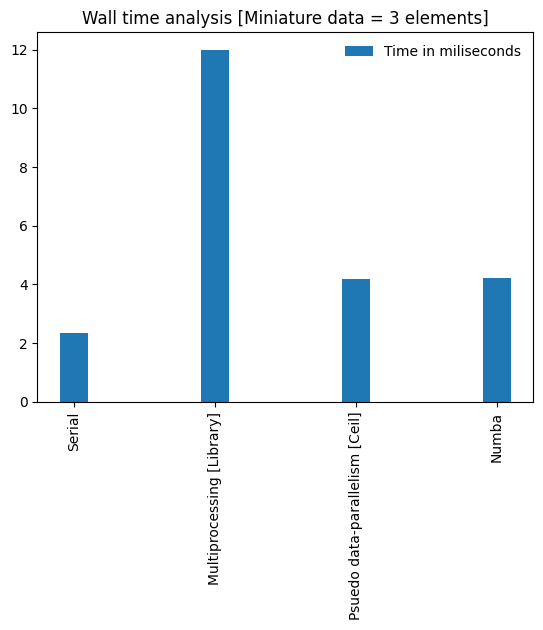

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t=[2.35, 12.0, 4.19 , 4.22]
ty=["Serial", "Multiprocessing [Library]", "Psuedo data-parallelism [Ceil]" , "Numba"]
nodes= np.arange(len(t))

plt.bar(nodes,t,width=0.2, align='center' ,label='Time in miliseconds')

plt.title("Wall time analysis [Miniature data = 3 elements]")

plt.xticks(nodes,ty,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()

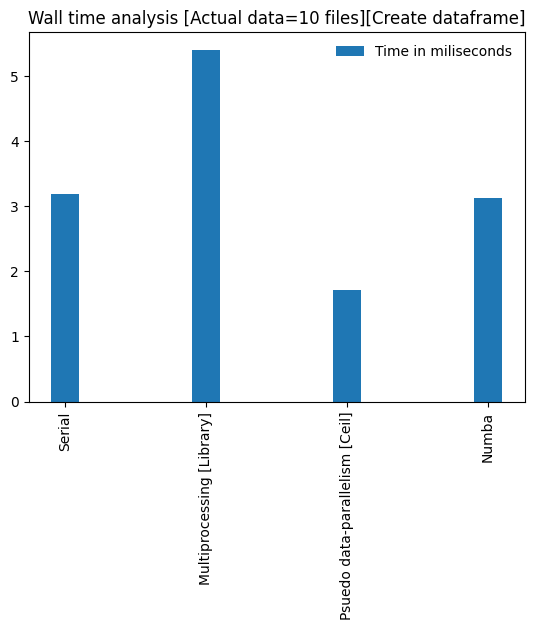

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t=[3.18 , 5.4, 1.71 , 3.13]
ty=["Serial", "Multiprocessing [Library]", "Psuedo data-parallelism [Ceil]" , "Numba"]
nodes= np.arange(len(t))

plt.bar(nodes,t,width=0.2, align='center' ,label='Time in miliseconds')

plt.title("Wall time analysis [Actual data=10 files][Create dataframe]")

plt.xticks(nodes,ty,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()

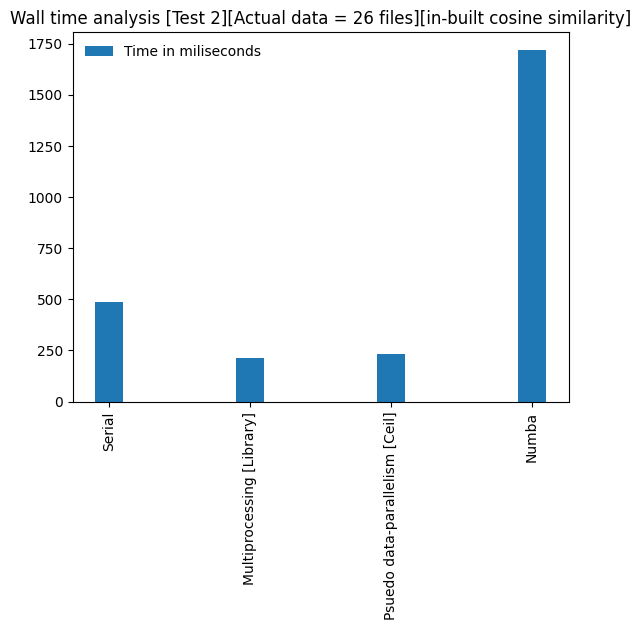

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t=[485 , 212, 233 ,1720]
ty=["Serial", "Multiprocessing [Library]", "Psuedo data-parallelism [Ceil]" , "Numba"]
nodes= np.arange(len(t))


plt.bar(nodes,t,width=0.2, align='center' ,label='Time in miliseconds')

plt.title("Wall time analysis [Test 2][Actual data = 26 files][in-built cosine similarity]")

plt.xticks(nodes,ty,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()

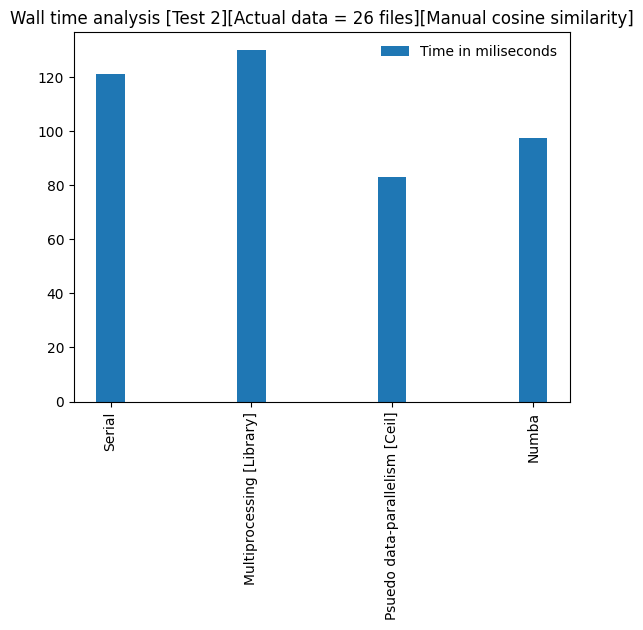

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t=[121 , 130, 82.9 ,97.5]
ty=["Serial", "Multiprocessing [Library]", "Psuedo data-parallelism [Ceil]" , "Numba"]
nodes= np.arange(len(t))

plt.bar(nodes,t,width=0.2, align='center' ,label='Time in miliseconds')

plt.title("Wall time analysis [Test 2][Actual data = 26 files][Manual cosine similarity]")

plt.xticks(nodes,ty,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()

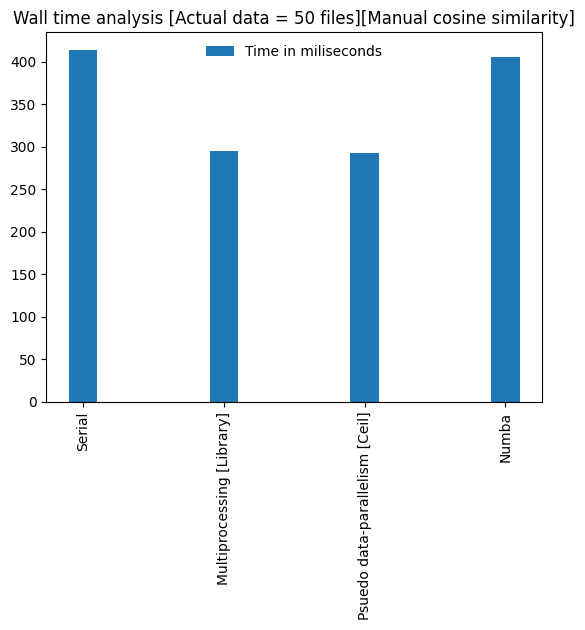

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t=[414 , 295, 292.9 ,405]
ty=["Serial", "Multiprocessing [Library]", "Psuedo data-parallelism [Ceil]" , "Numba"]
nodes= np.arange(len(t))

plt.bar(nodes,t,width=0.2, align='center' ,label='Time in miliseconds')

plt.title("Wall time analysis [Actual data = 50 files][Manual cosine similarity]")

plt.xticks(nodes,ty,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()

# **Module 2: PDF-to-text converter**

In [1]:
pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.8 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()

Saving SW.pdf to SW.pdf
Saving SW1.pdf to SW1.pdf
Saving SW2.pdf to SW2.pdf
Saving SW3.pdf to SW3.pdf


In [6]:
# importing required modules
import PyPDF2

In [9]:
student_files_pdf = [doc for doc in os.listdir() if doc.endswith('.pdf')]
student_files_pdf

['SW.pdf', 'SW3.pdf', 'SW1.pdf', 'SW2.pdf']

In [10]:
# creating a pdf file object
def convert(path):

  pin='/content/'+path
  print(f"Converting {pin.split('/')[-1]}...")
  pout=pin[:-4]+".txt"
  print(pout)
  pdfFileObj = open(pin, 'rb')

  # creating a pdf reader object
  pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

  # printing number of pages in pdf file
  print(f"Number of pages: {pdfReader.numPages}")

  # creating a page object
  s=""
  for i in range(pdfReader.numPages):
    pageObj = pdfReader.getPage(i)

    # extracting text from page
    s+=pageObj.extractText()
  print(f"Writing contents of {pin} to {pout}")
  myText = open(pout,'w')


  myText.write(s)
  myText.close()
  pdfFileObj.close()
  print('_'*100)

# closing the pdf file object


In [11]:
from PyPDF2 import PdfReader

def convert2(file):
    pin = '/content/' + file
    print(f"Converting {pin}...")
    pout = pin[:-4] + ".txt"
    print(pout)

    try:
        pdfReader = PdfReader(pin)
        num_pages = len(pdfReader.pages)

        if num_pages > 0:
            s = ""
            for page in pdfReader.pages:
                s += page.extract_text()

            print(f"Number of pages: {num_pages}")
            print(f"Writing contents of {pin} to {pout}")

            with open(pout, 'w') as myText:
                myText.write(s)
        else:
            print(f"No pages found in {pin}")
    except Exception as e:
        print(f"Error converting {pin}: {str(e)}")

    print('_' * 100)
    return pout




---



In [12]:
%%time
#Multiprocessing approach
# creating a pdf file object
def convert2(student_files_pdf):
  for i in student_files_pdf:
    try:
      path=i
      pin='/content/'+path
      print(f"Converting {pin.split('/')[-1]}...")
      pout=pin[:-4]+".txt"
      print(pout)
      pdfFileObj = open(pin, 'rb')

      # creating a pdf reader object
      pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

      # printing number of pages in pdf file
      print(f"Number of pages: {pdfReader.numPages}")

      # creating a page object
      s=""
      for i in range(pdfReader.numPages):
        pageObj = pdfReader.getPage(i)

        # extracting text from page
        s+=pageObj.extractText()
      print(f"Writing contents of {pin} to {pout}")
      myText = open(pout,'w')


      myText.write(s)
      myText.close()
      pdfFileObj.close()
      print('_'*100)
    except:
      print("Cannot convert",i)
      print('_'*100)



CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10 µs


In [13]:
import multiprocessing

# Split the list of files into two halves
l1 = student_files_pdf[:len(student_files_pdf) // 2]
l2 = student_files_pdf[len(student_files_pdf) // 2:]

# Use multiprocessing Pool to parallelize the conversion process
pool = multiprocessing.Pool(processes=2)
result1 = pool.map(convert2, l1)
result2 = pool.map(convert2, l2)

# Combine the results from both processes
result = result1 + result2

# Print the results
for res in result:
    print(res)


Converting S...Converting S...
/conte.txt
/conte.txt
Cannot convert 
SCannot convert 
S
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Converting W...
/conte.txtConverting W...
Cannot convert 
/conte.txt
W
Cannot convert____________________________________________________________________________________________________ W

____________________________________________________________________________________________________
Converting ....
Converting 3...
/conte.txt/conte.txt

Cannot convertCannot convert  .3

________________________________________________________________________________________________________________________________________________________________________________________________________

Converting p...Converting ....

/conte.txt/conte.txt

Cannot convert Cannot convertp 
.___________________________________________



---





---
# **Final Results**


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


nodes= np.arange(len(t))
ty=["Serial", "Multiprocessing [Library]", "Psuedo data-parallelism [Ceil]" , "Numba"]




t=[2.35, 12.0, 4.19 , 4.22]
plt.bar(nodes,t,width=0.1, align='center' ,label='[Miniature data=3 mini-files]')

t1=[3.18 , 5.4, 1.71 , 3.13]
plt.bar(nodes+0.15,t1,width=0.1, align='center' ,label='[Actual data=10 files]')

t2=[485 , 212, 233 ,1720]
plt.bar(nodes+0.3,t2,width=0.1, align='center' ,label='[Actual data = 26 files][in-built cosine similarity]')

t3=[121 , 130, 82.9 ,97.5]
plt.bar(nodes+0.45,t3,width=0.1, align='center' ,label='[Actual data = 26 files][Manual cosine similarity]')

t4=[414 , 295, 292.9 ,405]
plt.bar(nodes+0.6,t4,width=0.1, align='center' ,label='[Actual data = 50 files][Manual cosine similarity]')



plt.title("Wall time analysis")

plt.xticks(nodes,ty,rotation=90)

plt.legend(loc='best', frameon=True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t=[36.4 , 35]
ty=["Serial", "Multiprocessing"]
nodes= np.arange(len(t))

plt.bar(nodes,t,width=0.2, align='center' ,label='Time in seconds')

plt.title("Wall time analysis [Actual data = 50 files][File conversion]")

plt.xticks(nodes,ty,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()



---


# **Rough space**

In [ ]:
# a=[1,2,5,3,4]
# b=[1,2,4,5,6]
# dot(a, b)/(norm(a)*norm(b))

In [ ]:
# import sys
# import time
# for i in range(10):
#     a="Loading" + "." * i
#     sys.stdout.write("\r"+a) # Cursor up one line
#     time.sleep(1)

In [ ]:
# for data in ans:
#   for rowName in range(len(student_files)):
#     if df.index[rowName]==data[0]:
#       r=rowName
#       for colName in range(len(student_files)):
#         if df.index[colName]==data[1]:
#           c=colName

#           df.iloc[r,c] = data[2]
# df

In [ ]:
# df=pd.DataFrame(np.zeros((len(student_files),len(student_files))),index=student_files,columns=student_files)
# df

In [ ]:
# df2=pd.DataFrame(np.zeros((len(student_files),len(student_files))),index=student_files,columns=student_files)
# df2

In [ ]:
# for data in a:
#   for rowName in range(len(student_files)):
#     if df2.index[rowName]==data[0]:
#       r=rowName
#       for colName in range(len(student_files)):
#         if df2.index[colName]==data[1]:
#           c=colName

#           df2.iloc[r,c] = data[2]
# df2

In [ ]:
# from numba import jit


# def sq(n):
#   s=0
#   for i in range(n):
#     s+=i**2
#   print(s)


In [ ]:
# %%time
# sq(100000)

In [ ]:
# from numba import jit

# # @jit(nopython=True)
# def sq2(n):
#   s=0
#   for i in range(n):
#     s+=i**2
#   print(s)


In [ ]:
# %%time
# ans=jit(nopython=True)(sq2)

In [ ]:
# %%time
# ans(100000)